Linear Regression (1 feature)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/StudentPerformanceFactors.csv') 
df.dropna(inplace=True)

print(df.head())
print(df.info())
print(df.describe())


print(df.isnull().sum())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [36]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for col in ['Hours_Studied', 'Exam_Score']:
    df = remove_outliers_iqr(df, col)

print("Shape after removing outliers:", df.shape)



Shape after removing outliers: (6248, 20)


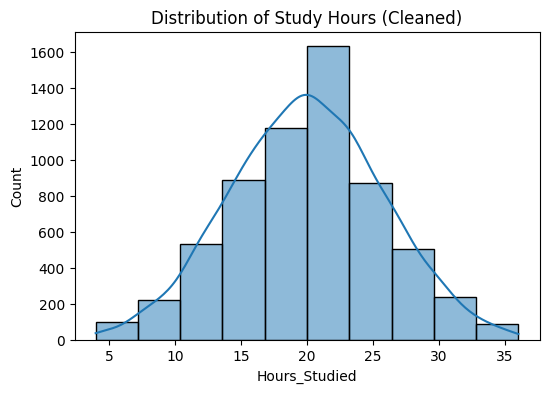

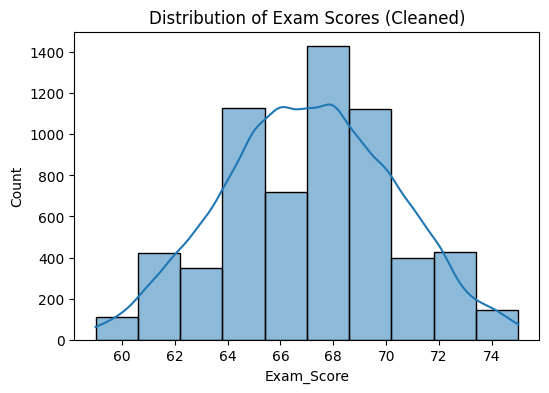

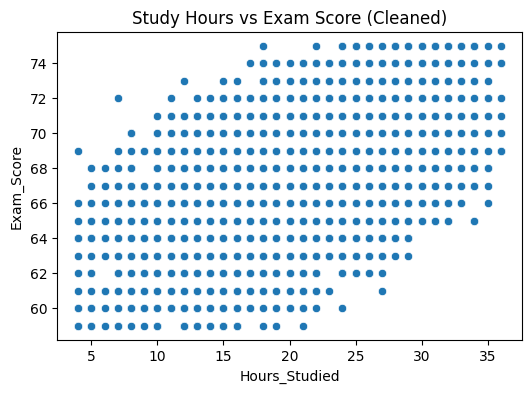

In [37]:

plt.figure(figsize=(6,4))
sns.histplot(df['Hours_Studied'], bins=10, kde=True)
plt.title('Distribution of Study Hours (Cleaned)')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Exam_Score'], bins=10, kde=True)
plt.title('Distribution of Exam Scores (Cleaned)')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Study Hours vs Exam Score (Cleaned)')
plt.show()


Mean Squared Error: 7.83
R^2 Score: 0.25


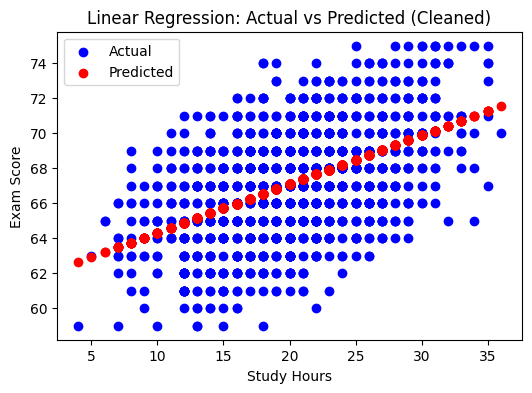

In [38]:

X = df[['Hours_Studied']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Actual vs Predicted (Cleaned)')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.show()


Polynomial Regression (1 feature)

In [39]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/StudentPerformanceFactors.csv')
df.dropna(inplace=True)


for col in ['Hours_Studied', 'Exam_Score']:
    df = remove_outliers_iqr(df, col)

X = df[['Hours_Studied']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (degree=2)")
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"R^2 Score: {r2_poly:.2f}")


Polynomial Regression (degree=2)
Mean Squared Error: 7.83
R^2 Score: 0.25


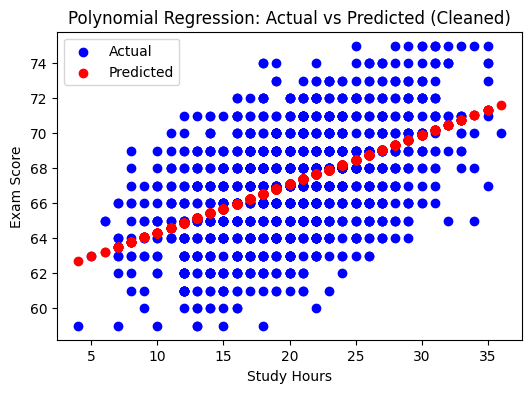

In [41]:

plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_poly, color='red', label='Predicted')
plt.title('Polynomial Regression: Actual vs Predicted (Cleaned)')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

visualization to understand the datase

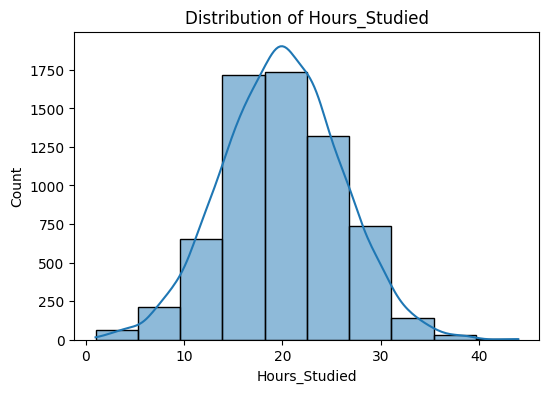

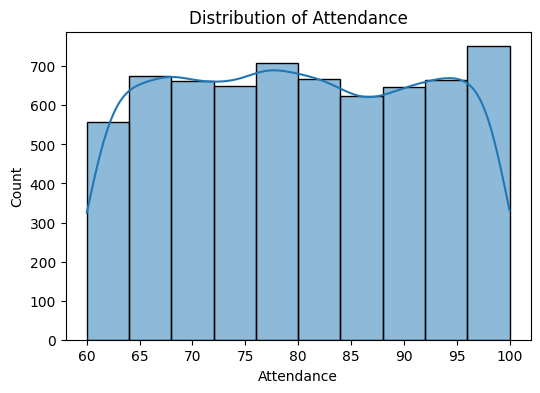

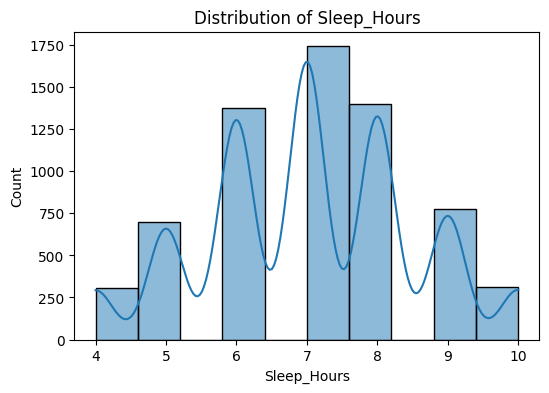

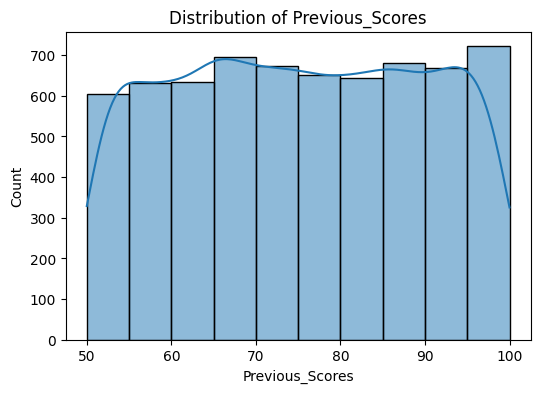

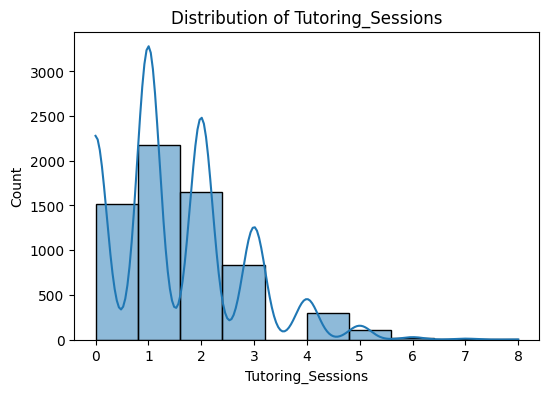

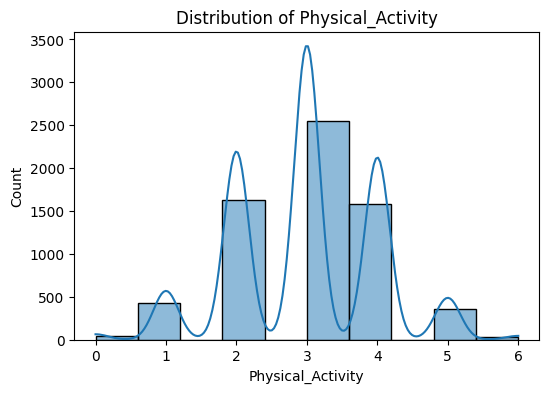

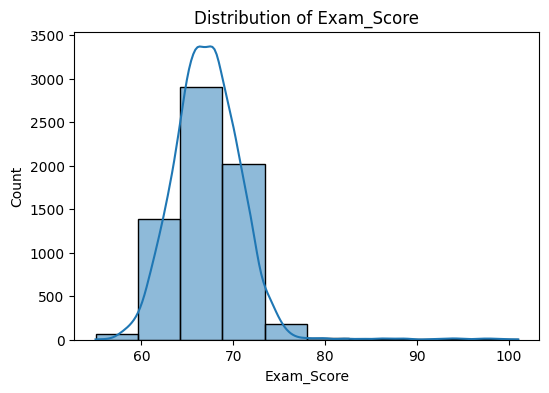

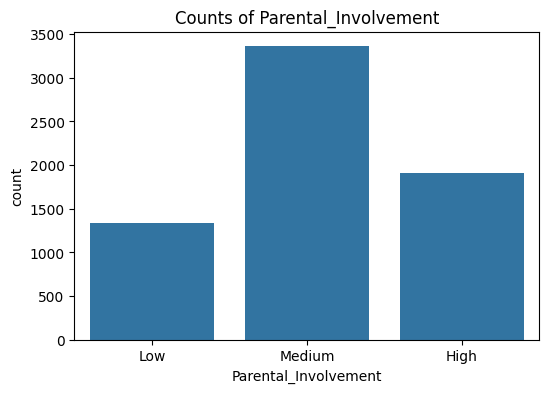

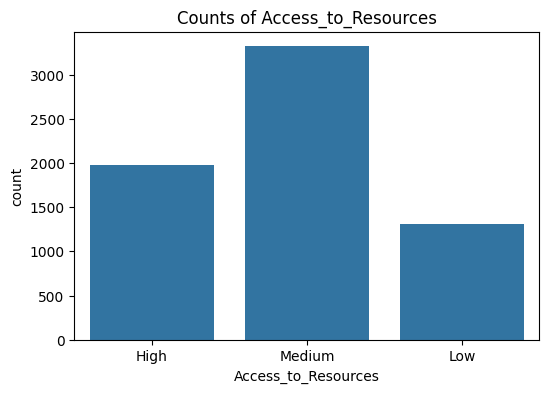

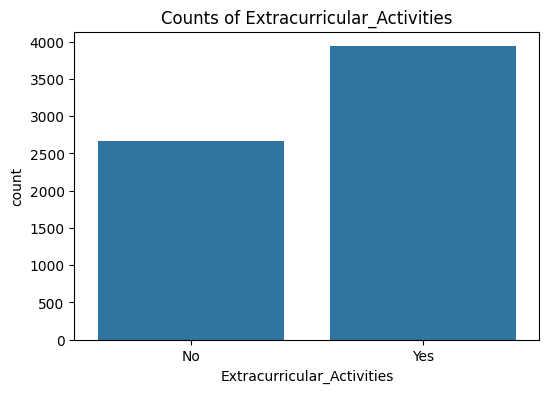

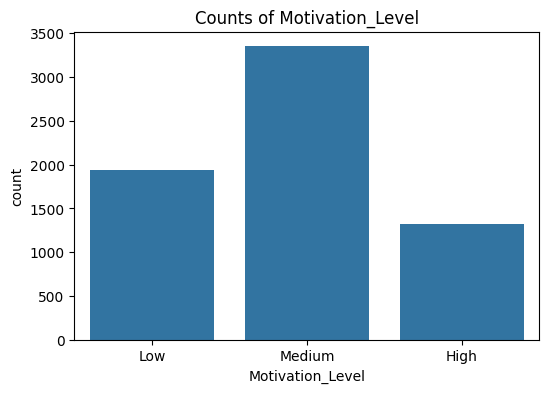

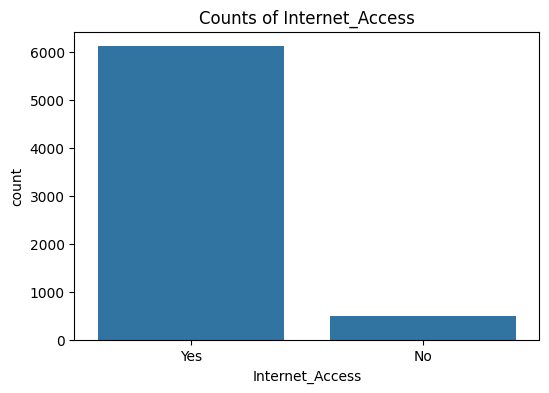

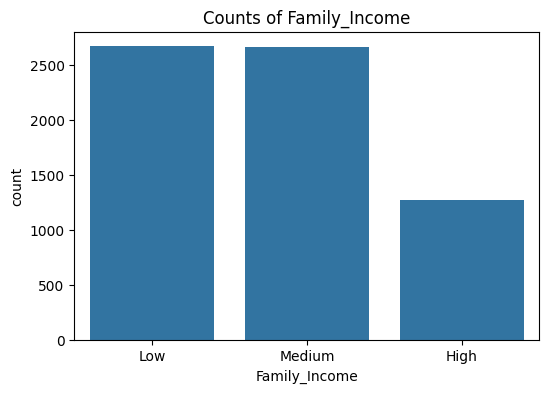

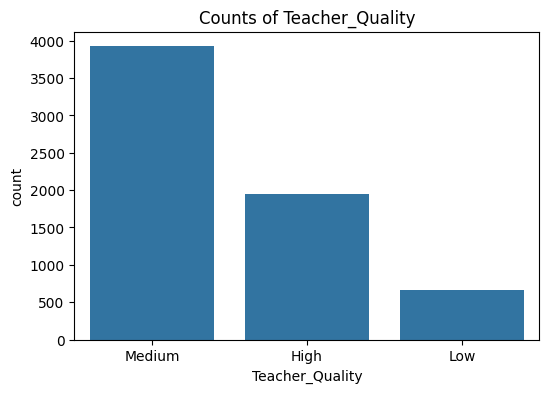

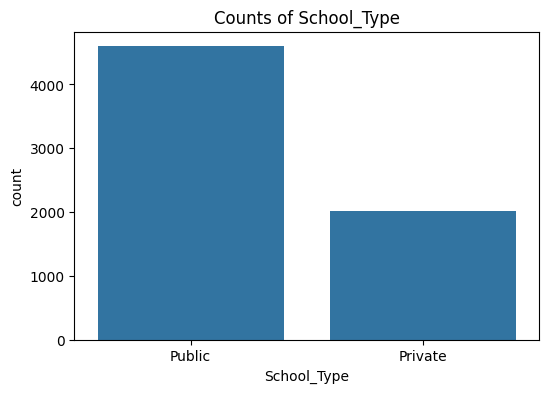

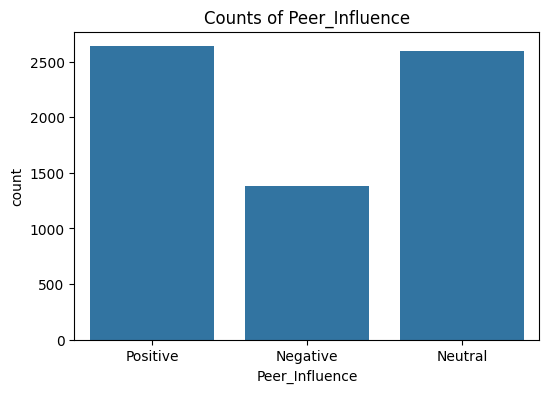

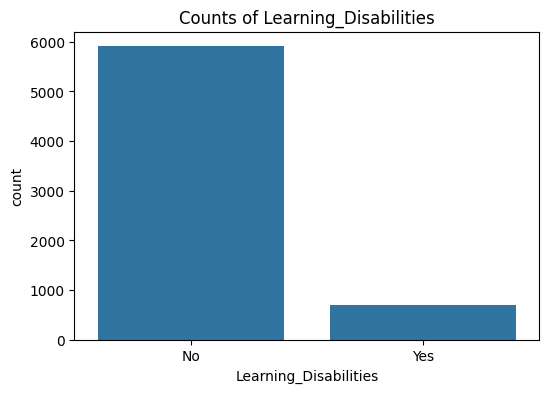

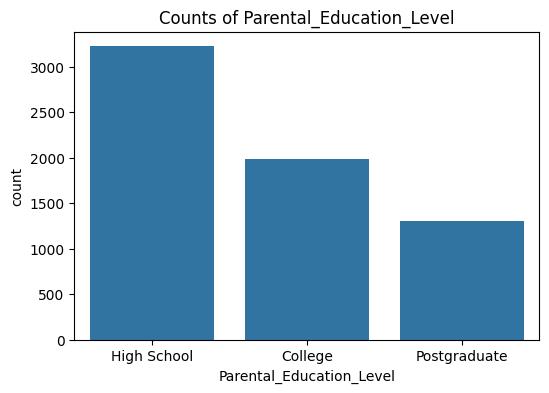

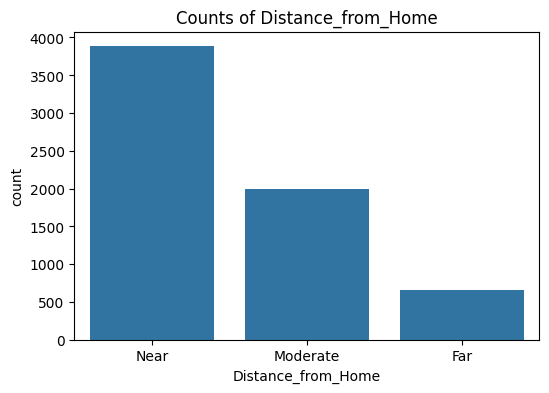

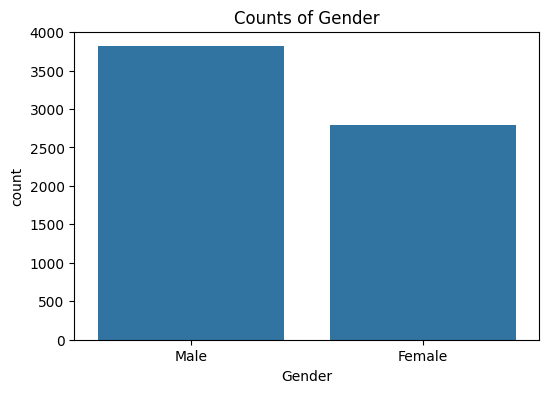

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/StudentPerformanceFactors.csv')

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Counts of {col}")
    plt.show()


Linear Regression (multiple feature)

all features

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('/content/StudentPerformanceFactors.csv')
df.dropna(inplace=True)


le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))


numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression after Label Encoding and removing outliers")
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")


Linear Regression after Label Encoding and removing outliers
MSE: 1.20
R^2: 0.88


13 features

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('/content/StudentPerformanceFactors.csv')
df.dropna(inplace=True)


le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))


numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


X = df.drop(['Exam_Score', 'Internet_Access', 'Learning_Disabilities', 'Gender','Parental_Education_Level' , 'School_Type'], axis=1)
y = df['Exam_Score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression after Label Encoding and removing outliers")
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")


Linear Regression after Label Encoding and removing outliers
MSE: 1.22
R^2: 0.88


Polynomial Regression all features

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/StudentPerformanceFactors.csv')
df.dropna(inplace=True)


le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))


numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (degree=2) after Label Encoding and removing outliers")
print(f"MSE: {mse_poly:.2f}")
print(f"R^2: {r2_poly:.2f}")


Polynomial Regression (degree=2) after Label Encoding and removing outliers
MSE: 0.10
R^2: 0.99
